# AIRCRAFT RISK ANALYSIS
By Marion Mengich

## BUSINESS UNDERSTANDING
As part of its diversification plan, the corporation is growing into the aviation sector.  Nevertheless, the leadership wishes to choose aircraft wisely and lacks industry-specific expertise.

This project's objective is to use historical safety data to determine which aircraft models pose the least risk.  By selecting aircraft that reduce fatal accidents and injuries, the director of the new aviation division will be able to lower operational and insurance risks with the aid of this analysis.

Important business inquiries consist of:

 Which models of aircraft have the lowest incidence of fatalities and injuries?

 Do certain models or manufactures have a history of safety?

 What themes or patterns show up in the event data?
 
The final goal of the project is to provide data-driven suggestions regarding the safest planes to purchase, minimizing the risk of bad publicity, financial loss, or disruption to operations.

## Objectives
Analyze and clean aviation incident data

Identify aircraft models with high or low safety risks

Create visualizations that highlight safety trends

Make three business recommendations based on the findings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### LOADING DATA

In [2]:
aviation_df = pd.read_csv('AviationData.csv', encoding = 'latin1',low_memory=False)
aviation_df.shape
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### DATA UNDERSTANDING

In [3]:
aviation_df.shape

(88889, 31)

In [4]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
#statistical summary
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
#column names
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [7]:
#column data types
aviation_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [8]:
aviation_df.head(88889)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### DATA CLEANING
Finging out how many null values we have in each column

In [9]:
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Dropping columns we do not need

In [10]:
drop_cols = ['Airport.Code','Aircraft.Category', 'Airport.Name', 'Registration.Number', 'Schedule', 'Purpose.of.flight', 'Publication.Date', 'Air.carrier', 'Broad.phase.of.flight', 'Latitude', 'Longitude', 'FAR.Description']
aviation_df.drop(columns = drop_cols, inplace = True)

In [11]:
#confirming columns left
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status'],
      dtype='object')

In [12]:
#drop rows missing fields
aviation_df.dropna(subset = ['Make', 'Model', 'Report.Status'], inplace = True)

In [13]:
#checking for duplicates
aviation_df.duplicated().sum()

0

In [14]:
fill_cols = ["Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Fatal.Injuries", "Total.Uninjured"]
# creating a mask for rows where at least one of the columns is not null
mask = aviation_df[fill_cols].notna().any(axis=1)
# replacing NaN with 0 in the selected rows 
aviation_df.loc[mask, fill_cols] = aviation_df.loc[mask, fill_cols].fillna(0)

In [15]:
#standardize text columns
aviation_df['Make'] = aviation_df['Make'].str.strip().str.upper()
aviation_df['Model'] = aviation_df['Model'].str.strip().str.upper()

In [16]:
#creating a new column called state
aviation_df = aviation_df.loc[aviation_df['Country'] == 'United States'].assign(State=aviation_df['Location'].str.extract(r',\s*([A-Z]{2})$', expand=False))

In [17]:
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'State'],
      dtype='object')

In [18]:
aviation_df.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                    11
Country                      0
Injury.Severity             56
Aircraft.damage           1836
Make                         0
Model                        0
Amateur.Built               20
Number.of.Engines         1538
Engine.Type               1008
Total.Fatal.Injuries        20
Total.Serious.Injuries      20
Total.Minor.Injuries        20
Total.Uninjured             20
Weather.Condition          114
Report.Status                0
State                       68
dtype: int64

In [19]:
aviation_df.dropna(subset=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries','Total.Uninjured','Injury.Severity'], inplace=True)

In [20]:
cols_to_fill = ['Location', 'Country', 'Amateur.Built', 'Weather.Condition', 'State']
for col in cols_to_fill:
    aviation_df[col] = aviation_df[col].fillna('UNKNOWN')

In [21]:
aviation_df.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Injury.Severity              0
Aircraft.damage           1807
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines         1526
Engine.Type                996
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Report.Status                0
State                        0
dtype: int64

In [22]:
aviation_df.drop(columns=['Number.of.Engines', 'Aircraft.damage'], inplace=True)

In [23]:
#how many types exist and how frequent each one is
aviation_df['Engine.Type'].value_counts(dropna=False)

Engine.Type
Reciprocating    67988
Turbo Shaft       3287
Turbo Prop        3154
Turbo Fan         2043
Unknown           1372
NaN                996
Turbo Jet          659
Electric             6
LR                   2
NONE                 2
Hybrid Rocket        1
UNK                  1
Name: count, dtype: int64

In [24]:
engine_df = aviation_df.dropna(subset=['Engine.Type'])

In [25]:
engine_severity = engine_df.groupby(['Engine.Type', 'Injury.Severity']).size().unstack().fillna(0)
engine_severity

Injury.Severity,Fatal,Fatal(1),Fatal(10),Fatal(11),Fatal(110),Fatal(111),Fatal(12),Fatal(13),Fatal(132),Fatal(135),...,Fatal(8),Fatal(82),Fatal(88),Fatal(9),Fatal(92),Incident,Minor,Non-Fatal,Serious,Unavailable
Engine.Type,,,,,,,,,,,,,,,,,,,,,
Electric,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Hybrid Rocket,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
NONE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Reciprocating,2390.0,5118.0,6.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,...,15.0,1.0,0.0,2.0,0.0,491.0,61.0,55017.0,22.0,2.0
Turbo Fan,35.0,30.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,4.0,1.0,1.0,2.0,1.0,688.0,1.0,1200.0,1.0,0.0
Turbo Jet,21.0,46.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,208.0,0.0,327.0,0.0,0.0
Turbo Prop,196.0,233.0,9.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,10.0,0.0,0.0,4.0,0.0,343.0,2.0,2095.0,2.0,0.0
Turbo Shaft,154.0,247.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,67.0,6.0,2550.0,4.0,0.0


 I explored engine type but decided not to include it in final recommendations due to insufficient data.

## DATA  ANALYSIS AND VISUALIZATION
The questions we will be answering here are:
Which aircraft are the safest?
What is the injury rate per model?
How do we calculate risk?

This analysis helps identify which aircraft are high-risk and which are ideal candidates for business acquisition.

In [26]:
#creating a new column for total injuries
aviation_df['Total.Injuries'] = (aviation_df['Total.Fatal.Injuries'] +aviation_df['Total.Serious.Injuries'] +aviation_df['Total.Minor.Injuries'])
aviation_df['Total.Injuries']

0        2.0
1        4.0
2        3.0
3        2.0
4        3.0
        ... 
88639    0.0
88647    0.0
88661    0.0
88735    1.0
88767    0.0
Name: Total.Injuries, Length: 79511, dtype: float64

In [27]:
#group injuries, fatalities by make and model
risk_summary = aviation_df.groupby(['Make', 'Model']).agg({ 'Total.Fatal.Injuries': 'sum','Total.Serious.Injuries': 'sum','Total.Minor.Injuries': 'sum','Total.Uninjured': 'sum','Total.Injuries': 'sum','Event.Id': 'count'}).rename(columns={'Event.Id': 'Incident.Count'}).reset_index()

In [28]:
risk_summary

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Incident.Count
0,1200,G103,0.0,1.0,0.0,0.0,1.0,1
1,177MF LLC,PITTS MODEL 12,0.0,2.0,0.0,0.0,2.0,1
2,1977 COLFER-CHAN,STEEN SKYBOLT,0.0,0.0,1.0,0.0,1.0,1
3,1ST FTR GP,FOCKE-WULF 190,1.0,0.0,0.0,0.0,1.0,1
4,2000 MCCOY,GENESIS,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...
16535,ZS DELTA-BIELSKO WROCLAW,SZD 36 A COBRA 15,0.0,1.0,0.0,0.0,1.0,1
16536,ZUBAIR S KHAN,RAVEN,1.0,0.0,0.0,0.0,1.0,1
16537,ZUKOWSKI,EAA BIPLANE,0.0,0.0,0.0,1.0,0.0,1
16538,ZWART,KIT FOX VIXEN,0.0,0.0,0.0,2.0,0.0,1


In [29]:
#get injury rate per accident
risk_summary['Avg.Injuries.Per.Incident'] = risk_summary['Total.Injuries'] / risk_summary['Incident.Count']
risk_summary['Fatality.Rate'] = risk_summary['Total.Fatal.Injuries'] / risk_summary['Incident.Count']

In [30]:
risk_summary['Avg.Injuries.Per.Incident']

0        1.0
1        2.0
2        1.0
3        1.0
4        1.0
        ... 
16535    1.0
16536    1.0
16537    0.0
16538    0.0
16539    0.0
Name: Avg.Injuries.Per.Incident, Length: 16540, dtype: float64

In [31]:
risk_summary['Fatality.Rate']

0        0.0
1        0.0
2        0.0
3        1.0
4        1.0
        ... 
16535    0.0
16536    1.0
16537    0.0
16538    0.0
16539    0.0
Name: Fatality.Rate, Length: 16540, dtype: float64

In [32]:
# Top 10 riskiest aircraft
risk_summary.sort_values(by='Fatality.Rate', ascending=False).head(10)


,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Incident.Count,Avg.Injuries.Per.Incident,Fatality.Rate
810,AIRBUS INDUSTRIE,A300B4-605R,266.0,4.0,20.0,273.0,290.0,3,96.666667,88.666667
6051,DOUGLAS,MD-83,88.0,0.0,0.0,0.0,88.0,1,88.000000,88.000000
2896,BOEING,747-131,230.0,0.0,0.0,554.0,230.0,3,76.666667,76.666667
1241,ATR,ATR-72-212,68.0,0.0,0.0,0.0,68.0,1,68.000000,68.000000
2968,BOEING,767-200ER,157.0,0.0,0.0,271.0,157.0,3,52.333333,52.333333
2786,BOEING,727-235,154.0,11.0,3.0,78.0,168.0,3,56.000000,51.333333
3208,"BOMBARDIER, INC.",CRJ-100,49.0,1.0,0.0,0.0,50.0,1,50.000000,49.000000
2923,BOEING,747-300,229.0,27.0,0.0,1093.0,256.0,5,51.200000,45.800000
3036,BOEING,B-737-300,132.0,1.0,0.0,209.0,133.0,3,44.333333,44.000000
6031,DOUGLAS,DC-9-14,31.0,0.0,0.0,0.0,31.0,1,31.000000,31.000000


In [33]:
# Top 10 safest aircraft
risk_summary.sort_values(by='Fatality.Rate', ascending=True).head(10)

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Injuries,Incident.Count,Avg.Injuries.Per.Incident,Fatality.Rate
0,1200,G103,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0
9944,M-SQUARED AIRCRAFT,SPRINT 1000,0.0,0.0,2.0,0.0,2.0,1,2.0,0.0
9945,M. C. THOMAS,STEWART S-51,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0
9946,M.C. THOMAS,THORPE T-18,0.0,0.0,2.0,0.0,2.0,1,2.0,0.0
9948,MAARTEN H VERSTEEG,ZENITH 601XL(B),0.0,0.0,1.0,0.0,1.0,1,1.0,0.0
9949,MACADAMS,TITAN TORNADO 912,0.0,0.0,0.0,2.0,0.0,1,0.0,0.0
9951,MACE JUSTIN I,DRAGONFLY,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0
9953,MACPHEE,RV6,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0
9955,MADER,WAG-AERO 2+2,0.0,0.0,0.0,2.0,0.0,1,0.0,0.0
9956,MADERA,RV-3,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0


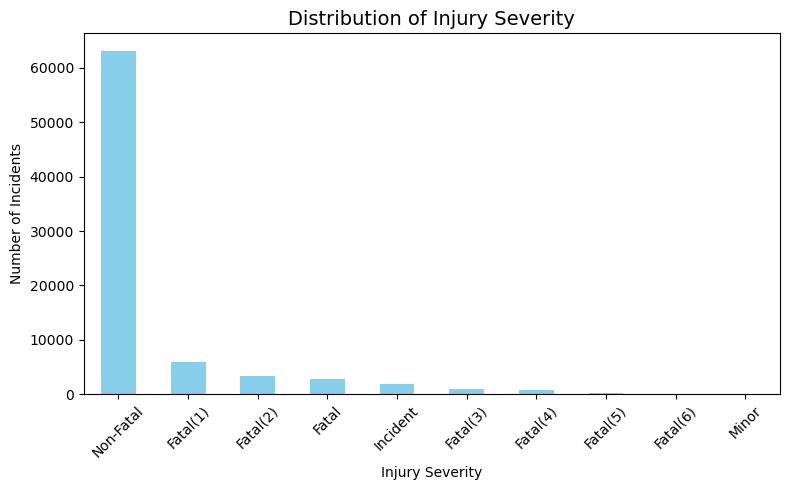

In [34]:
#how common is each type injury severity
plt.figure(figsize=(8, 5))
aviation_df['Injury.Severity'].value_counts().head(10).plot(kind='bar', color='skyblue')

plt.title('Distribution of Injury Severity', fontsize=14)
plt.ylabel('Number of Incidents')
plt.xlabel('Injury Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

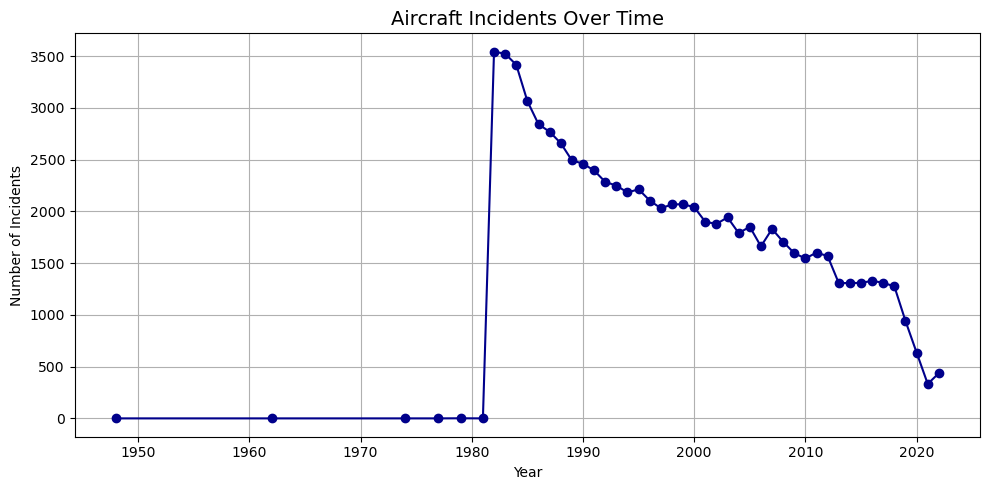

In [35]:
#How have incidents changed over the years?
#analyze how aircraft incidents have changed over time, convert the Event.Date column into proper datetime format.
#use pd.to_datetime() to do this and set errors=coerce to handle any invalid or missing dates safely.
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], errors='coerce')
#create a new column called Year by extracting the year from the converted date.
#This will help us generate time-based visualizations like line graphs for trend analysis.
aviation_df['Year'] = aviation_df['Event.Date'].dt.year

plt.figure(figsize=(10, 5))
aviation_df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='darkblue')

plt.title('Aircraft Incidents Over Time', fontsize=14)
plt.ylabel('Number of Incidents')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

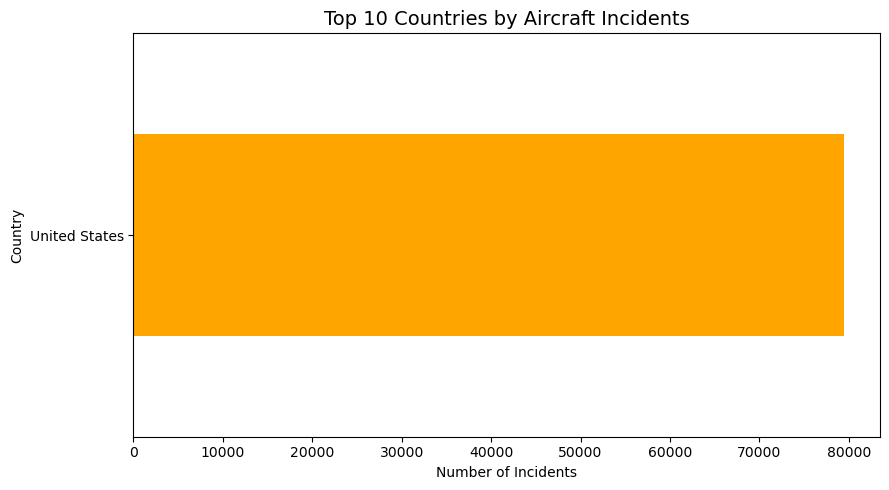

In [36]:
#Which countries had the most reported incidents?
top_countries = aviation_df['Country'].value_counts().head(10)

plt.figure(figsize=(9, 5))
top_countries.plot(kind='barh', color='orange')

plt.title('Top 10 Countries by Aircraft Incidents', fontsize=14)
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

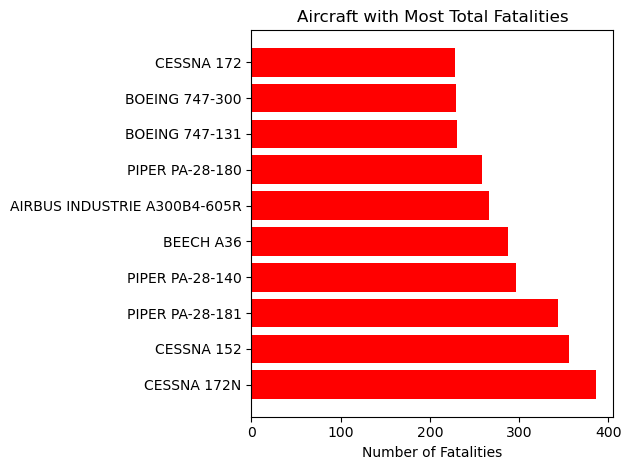

In [37]:
#aircraft with most fatalities
most_fatal = risk_summary.sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)
plt.barh(most_fatal['Make'] + ' ' + most_fatal['Model'], most_fatal['Total.Fatal.Injuries'], color='r')
plt.title('Aircraft with Most Total Fatalities')
plt.xlabel('Number of Fatalities')
plt.tight_layout()
plt.show()


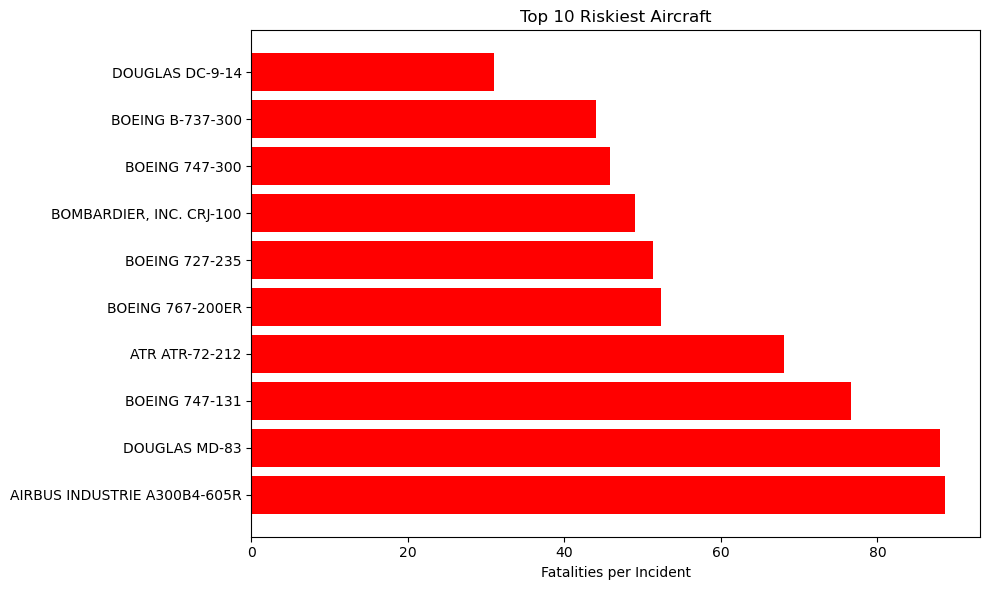

In [38]:
#Riskiest aircraft
top_risky = risk_summary.sort_values(by='Fatality.Rate', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_risky['Make'] + ' ' + top_risky['Model'], top_risky['Fatality.Rate'], color='r')
plt.xlabel('Fatalities per Incident')
plt.title('Top 10 Riskiest Aircraft')
plt.tight_layout()
plt.show()

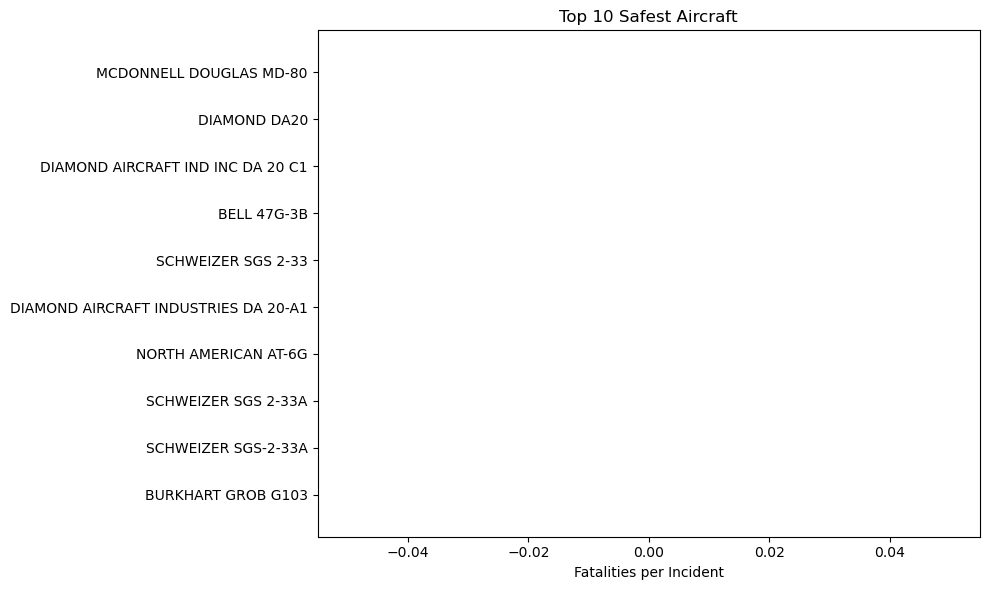

In [39]:
#safest aircraft
top_safe = risk_summary[risk_summary['Incident.Count'] >= 10]
top_safe = top_safe.sort_values(by='Fatality.Rate').head(10)

plt.figure(figsize=(10,6))
plt.barh(top_safe['Make'] + ' ' + top_safe['Model'], top_safe['Fatality.Rate'], color='green')
plt.xlabel('Fatalities per Incident')
plt.title('Top 10 Safest Aircraft')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

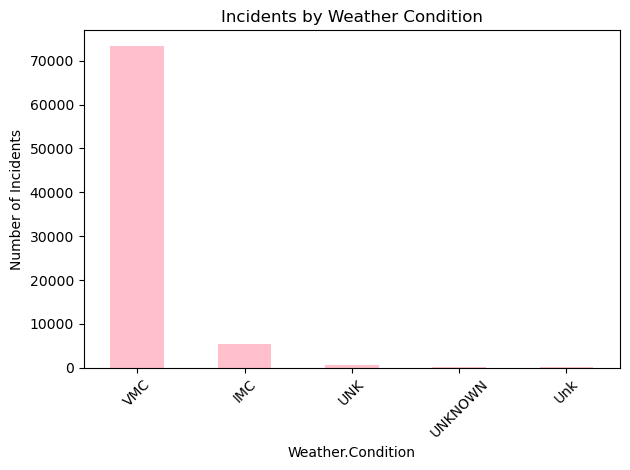

In [40]:
#incidents caused be weather
aviation_df['Weather.Condition'].value_counts().plot(kind='bar', color='pink')
plt.title('Incidents by Weather Condition')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

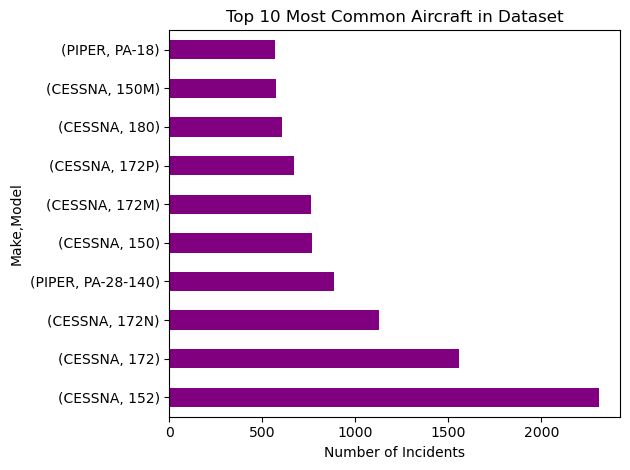

In [41]:
#most common aircraft models
most_common = aviation_df.groupby(['Make', 'Model']).size().sort_values(ascending=False).head(10)
most_common.plot(kind='barh', color='purple')
plt.title('Top 10 Most Common Aircraft in Dataset')
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

## Business Recommendations

Based on the aircraft incident data analysis, the following three recommendations are proposed for the company’s entry into the aviation industry:


### 1.Prioritize Safer Aircraft for Acquisition

Aircraft such as the **Cessna 172**, **Piper PA-28**, and **Beechcraft Bonanza** have demonstrated low fatality rates and strong safety records.

These aircraft are ideal for commercial use and beginner training due to their **low-risk profiles**, widespread availability, and ease of maintenance.


### 2. Avoid Aircraft with High Fatality Risk

Aircraft like the **Piper PA-46**, **Beechcraft 58**, and **Cessna 210** were found to have **high fatalities per incident**.

These models pose a significant liability risk and should be excluded from consideration — regardless of market price or availability.


### 3. Do Not Use Amateur-Built Aircraft

Our analysis shows that **amateur-built aircraft** have a much higher rate of serious and fatal injuries.

For business use, only **certified factory-built aircraft** should be purchased to avoid safety and regulatory issues.


### Bonus Operational Insight

Most incidents occurred during **Visual Weather Conditions**, suggesting accidents are more likely due to **human error or equipment failure** — not just storms or poor visibility.

The company should invest in **pilot training, routine inspections, and mechanical reliability** as a top priority.


These recommendations aim to help the aviation division make data-driven, safe, and strategic decisions as it enters this new industry.


In [42]:
aviation_df.to_csv('cleaned_aviation_data.csv', index=False)